In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegression



In [3]:
loan = pd.read_csv('/Users/shanesquires/Downloads/lending-club-loan-data/loan.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan = loan[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc',
             'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status']]

In [ ]:
loan['issue_d']=pd.to_datetime(loan['issue_d'])

In [50]:
loan['issue_d_year']=loan['issue_d'].dt.year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cb8b198>,
      dtype=object)

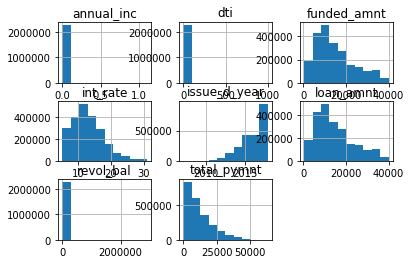

In [65]:
loan.hist()

In [117]:
loan.skew()

loan_amnt         0.777782
funded_amnt       0.778779
int_rate          0.768074
annual_inc      493.886088
dti              29.201854
revol_bal        13.231988
total_pymnt       1.275028
issue_d_year     -0.825370
dtype: float64

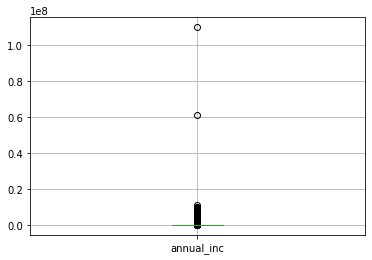

In [114]:
loan.boxplot(column='annual_inc', return_type='axes')

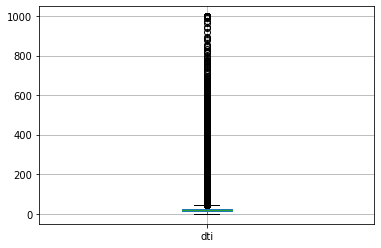

In [115]:
loan.boxplot(column='dti', return_type='axes')

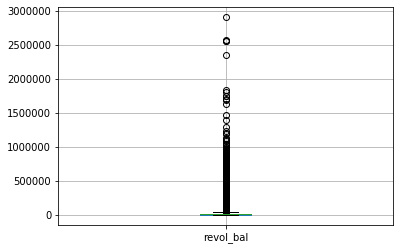

In [118]:
loan.boxplot(column='revol_bal', return_type='axes')

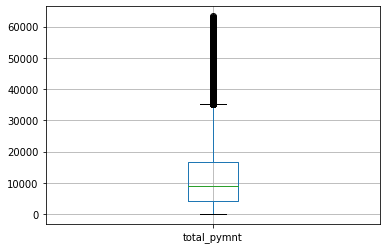

In [119]:
loan.boxplot(column='total_pymnt', return_type='axes')

In [66]:
loan.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,issue_d_year
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,1.309291e+01,7.799243e+04,1.882420e+01,1.665846e+04,1.182403e+04,2.015858e+03
std,9.190245e+03,9.188413e+03,4.832114e+00,1.126962e+05,1.418333e+01,2.294831e+04,9.889599e+03,1.792634e+00
min,5.000000e+02,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03
25%,8.000000e+03,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01,5.950000e+03,4.272580e+03,2.015000e+03
50%,1.290000e+04,1.287500e+04,1.262000e+01,6.500000e+04,1.784000e+01,1.132400e+04,9.060870e+03,2.016000e+03
75%,2.000000e+04,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01,2.024600e+04,1.670797e+04,2.017000e+03
max,4.000000e+04,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,2.904836e+06,6.329688e+04,2.018000e+03


In [67]:
loan.isna().sum()

loan_amnt          0
funded_amnt        0
term               0
int_rate           0
grade              0
annual_inc         4
issue_d            0
dti             1711
revol_bal          0
total_pymnt        0
loan_status        0
issue_d_year       0
dtype: int64

In [70]:
loanDtiNA =  loan[loan['dti'].isnull()]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b4fd0b8>,
      dtype=object)

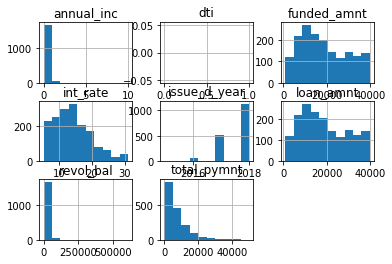

In [72]:
loanDtiNA.hist()

In [83]:
Tab = pd.crosstab(index=loan["grade"],  # Make a crosstab
                      columns="count")

In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [137]:
def doubleMAD(y,threshold=3.5):
    med = y.median()
    absDev = (y - med).abs()
    leftMad = absDev[y <= med].median()
    rightMad = absDev[y >= med].median()
    y_mad = leftMad * np.ones(len(y))
    y_mad[y > med] = rightMad
    modifiedZScore = 0.6745 * absDev / y_mad
    modifiedZScore[y == med] = 0
    return modifiedZScore < threshold

In [145]:
mask = doubleMAD(loan['annual_inc']) & doubleMAD(loan['dti']) & loan['dti']>=0 & doubleMAD(loan['revol_bal'])

In [146]:
loanSubset = loan[mask]

In [147]:
loanSubset.skew()

loan_amnt       0.816846
funded_amnt     0.817795
int_rate        0.761773
annual_inc      0.994345
dti             0.331014
revol_bal       1.319502
total_pymnt     1.302478
issue_d_year   -0.808288
dtype: float64

In [151]:
loanSubset.isna().sum()

loan_amnt       0
funded_amnt     0
term            0
int_rate        0
grade           0
annual_inc      0
issue_d         0
dti             0
revol_bal       0
total_pymnt     0
loan_status     0
issue_d_year    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126bd8e80>,
      dtype=object)

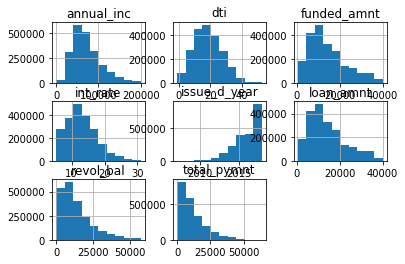

In [155]:
loanSubset.hist()

In [149]:
loan.shape

(2260668, 12)

In [150]:
2260668/2135067-1

0.05882766208273549

In [152]:
pd.crosstab(index=doubleMAD(loan['revol_bal']),  
                      columns="count")

col_0,count
revol_bal,
False,64644
True,2196024


In [109]:
pd.crosstab(index=doubleMAD(loan["annual_inc"]),  
                      columns="count")

col_0,count
annual_inc,
False,2197301
True,63367


In [110]:
pd.crosstab(index=doubleMAD(loan["dti"]),  
                      columns="count")

col_0,count
dti,
False,2248551
True,12117


In [153]:
pd.crosstab(index=mask,  
                      columns="count")

col_0,count
row_0,
False,125601
True,2135067


In [179]:
mask1 = (loanSubset['issue_d'] <= '2016-06-01') & loanSubset['term'].str.contains('36 months')

In [180]:
loanSubset1 = loanSubset[mask1]

In [188]:
Tab1 = pd.crosstab(index=loanSubset1['loan_status'],  
                      columns="count")

In [189]:
Tab1/Tab1.sum()

col_0,count
loan_status,
Charged Off,0.142457
Current,0.051511
Default,0.000005
Does not meet the credit policy. Status:Charged Off,0.000746
Does not meet the credit policy. Status:Fully Paid,0.002026
Fully Paid,0.800420
In Grace Period,0.000688
Late (16-30 days),0.000265
Late (31-120 days),0.001882


In [197]:
loanSubset1['default'] = np.where(loanSubset1['loan_status']=='Fully Paid', 0, 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
pd.crosstab(index=loanSubset1['default'],  
                      columns="count")

col_0,count
default,
0,606105
1,151129


In [202]:
yrGrdTab = pd.crosstab(index=loanSubset1["default"], 
                             columns=[loanSubset1["grade"],
                                      loanSubset1["issue_d_year"]],
                             margins=True)

In [209]:
yrGrdTab1 = yrGrdTab/yrGrdTab.loc["All"]

In [226]:
display(yrGrdTab1)

grade                A                                                    \
issue_d_year      2007      2008      2009      2010      2011      2012   
default                                                                    
0             0.779412  0.884106  0.924845  0.948955  0.935149  0.926293   
1             0.220588  0.115894  0.075155  0.051045  0.064851  0.073707   
All           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

grade                                                      B            \
issue_d_year      2013     2014      2015     2016      2007      2008   
default                                                                  
0             0.952975  0.94537  0.944725  0.65534  0.527473  0.746858   
1             0.047025  0.05463  0.055275  0.34466  0.472527  0.253142   
All           1.000000  1.00000  1.000000  1.00000  1.000000  1.000000   

grade                                                                     \
issue_d_year      2009      2010      2011      2012      2013      2014   
default                                                                    
0             0.850481  0.873593  0.892335  0.873665  0.901606  0.891641   
1             0.149519  0.126407  0.107665  0.126335  0.098394  0.108359   
All           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

grade                                   C                                \
issue_d_year      2015      2016     2007      2008      2009      2010   
default                                                                   
0             0.879061  0.621976  0.43609  0.633517  0.764336  0.786835   
1             0.120939  0.378024  0.56391  0.366483  0.235664  0.213165   
All           1.000000  1.000000  1.00000  1.000000  1.000000  1.000000   

grade                                                                     \
issue_d_year      2011      2012      2013      2014      2015      2016   
default                                                                    
0             0.841091  0.823723  0.845757  0.826991  0.803891  0.567732   
1             0.158909  0.176277  0.154243  0.173009  0.196109  0.432268   
All           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

grade                D                                                    \
issue_d_year      2007      2008      2009      2010      2011      2012   
default                                                                    
0             0.225806  0.412214  0.674967  0.709814  0.814876  0.786219   
1             0.774194  0.587786  0.325033  0.290186  0.185124  0.213781   
All           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

grade                                                       E            \
issue_d_year      2013      2014      2015     2016      2007      2008   
default                                                                   
0             0.795562  0.776776  0.735048  0.50803  0.084211  0.223048   
1             0.204438  0.223224  0.264952  0.49197  0.915789  0.776952   
All           1.000000  1.000000  1.000000  1.00000  1.000000  1.000000   

grade                                                                    \
issue_d_year      2009      2010      2011      2012      2013     2014   
default                                                                   
0             0.617544  0.667722  0.785156  0.778808  0.766073  0.72973   
1             0.382456  0.332278  0.214844  0.221192  0.233927  0.27027   
All           1.000000  1.000000  1.000000  1.000000  1.000000  1.00000   

grade                                    F                                   \
issue_d_year      2015      2016      2007 2008      2009    2010      2011   
default                                                                       
0             0.669562  0.451867  0.108696  0.1  0.526882  0.4875  0.734694   
1             0.330438  0.548133  0.891304  0.9  0.473118 

In [239]:
loanSubset1['annRateRet'] = (loanSubset1['total_pymnt'] / loanSubset1['funded_amnt'])**(1/3)-1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
loanSubset1['annRateRet'].describe()

count    757234.000000
mean          0.015386
std           0.096851
min          -1.000000
25%           0.022534
50%           0.040301
75%           0.059102
max           0.155050
Name: annRateRet, dtype: float64

In [254]:
annRetXYrGrd = loanSubset1.groupby(['grade', 'issue_d_year'])['annRateRet'].mean().reset_index()



In [256]:
annRetXYrGrd['annRateRet'].mean()

0.0060644786962967

In [263]:
loanSubset1['lannual_inc'] = np.log(loanSubset1['annual_inc'])
loanSubset1['lfunded_amnt'] = np.log(loanSubset1['funded_amnt'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [260]:
lrMod = LogisticRegression()

In [322]:
x = ['lannual_inc', 'dti', 'lfunded_amnt']

In [323]:
X = loanSubset1[x]

In [314]:
X.head()

,lannual_inc,dti,lfunded_amnt,grade
594362,11.695247,6.07,8.496990,B
594363,11.156251,22.86,9.392662,C
594365,11.775290,17.05,9.903488,A
594366,11.156251,25.00,9.952278,C
594367,11.002100,11.90,9.305651,B


In [324]:
y = loanSubset1['default']

In [325]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=27)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27,test_size=0.3)

In [327]:
cols = X_train.columns
os_X,os_y=os.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X,columns=cols )
os_y= pd.DataFrame(data=os_y,columns=['y'])

In [328]:
X=os_X[cols]
y=os_y['y']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27,test_size=0.3)

In [330]:
lrMod.fit(X_train, y_train)
lrMod.score(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5551020545558898

In [331]:
y_pred = lrMod.predict(X_test)

In [332]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[71772 55322]
 [58146 69393]]


In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56    127094
           1       0.56      0.54      0.55    127539

    accuracy                           0.55    254633
   macro avg       0.55      0.55      0.55    254633
weighted avg       0.55      0.55      0.55    254633



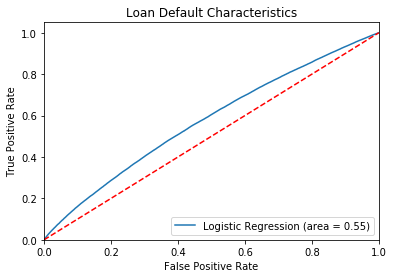

In [334]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logitRocAuc = roc_auc_score(y_test, lrMod.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lrMod.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logitRocAuc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Loan Default Characteristics')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [288]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [[-0.36537203  0.02182619  0.09746076]]
Intercept: 
 [1.31449585]


In [228]:
loanSubset1.dtypes

loan_amnt                int64
funded_amnt              int64
term                    object
int_rate               float64
grade                   object
annual_inc             float64
issue_d         datetime64[ns]
dti                    float64
revol_bal                int64
total_pymnt            float64
loan_status             object
issue_d_year             int64
default                  int64
dtype: object

In [195]:
loanSubset1.shape

(757234, 13)

In [165]:
loanSubset1['issue_d'].max()

Timestamp('2016-06-01 00:00:00')

In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [84]:
Tab/Tab.sum()

col_0,count
grade,
A,0.191548
B,0.293523
C,0.287549
D,0.143508
E,0.060000
F,0.018490
G,0.005382


In [79]:
naTab = pd.crosstab(index=loanDtiNA["grade"],  # Make a crosstab
                      columns="count") 

In [82]:
naTab/naTab.sum()

col_0,count
grade,
A,0.168907
B,0.255406
C,0.297487
D,0.192870
E,0.059030
F,0.016365
G,0.009936


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1298c5a90>]],
      dtype=object)

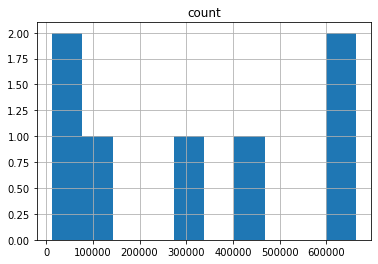

In [85]:
Tab.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1296dae48>]],
      dtype=object)

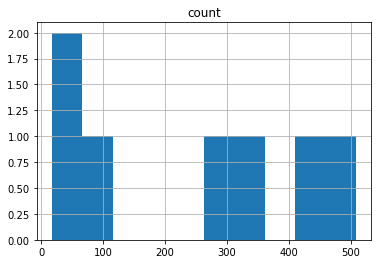

In [86]:
naTab.hist()

In [57]:
yearGrade = pd.crosstab(index=loan["issue_d_year"],  
                      columns=loan['grade'], margins=True) 

In [59]:
yearGrade

grade,A,B,C,D,E,F,G,All
issue_d_year,,,,,,,,
2007,78,98,141,99,100,52,35,603
2008,318,594,580,419,285,111,86,2393
2009,1203,1445,1348,817,308,105,55,5281
2010,2830,3687,2729,1885,962,311,133,12537
2011,5754,6565,3942,2796,1739,722,203,21721
2012,10901,18507,11875,7323,3185,1315,261,53367
2013,17679,44116,38134,20569,9059,4393,864,134814
2014,36108,61935,66565,42992,20121,6223,1685,235629
2015,73336,117606,120567,62654,34948,9817,2167,421095


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128be0b38>]],
      dtype=object)

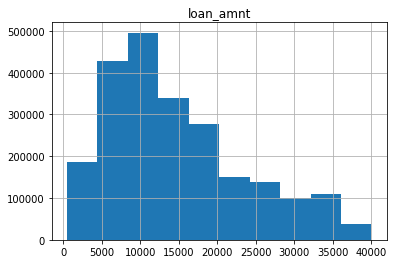

In [12]:
loan.hist(column='loan_amnt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131ab4278>]],
      dtype=object)

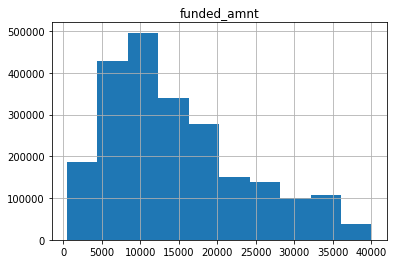

In [13]:
loan.hist(column='funded_amnt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fdab3c8>]],
      dtype=object)

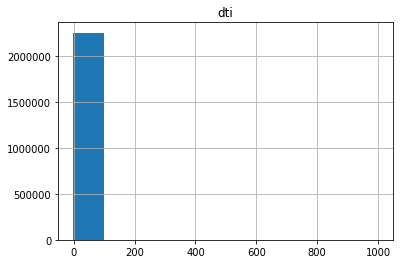

In [19]:
loan.hist(column='dti')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131d42a90>]],
      dtype=object)

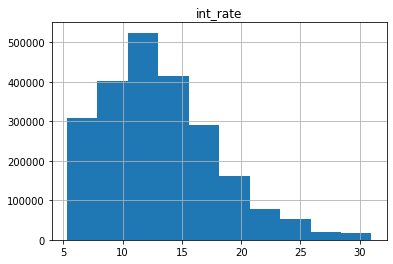

In [15]:
loan.hist(column='int_rate')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1302f19b0>]],
      dtype=object)

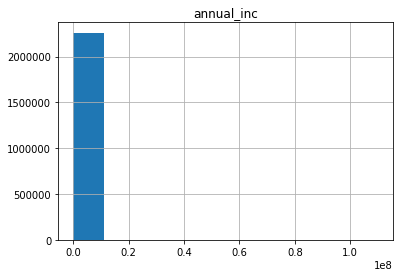

In [17]:
loan.hist(column='annual_inc')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fa153c8>]],
      dtype=object)

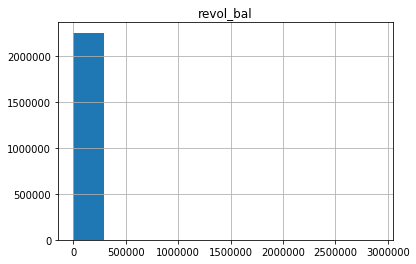

In [20]:
loan.hist(column='revol_bal')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d9c8470>]],
      dtype=object)

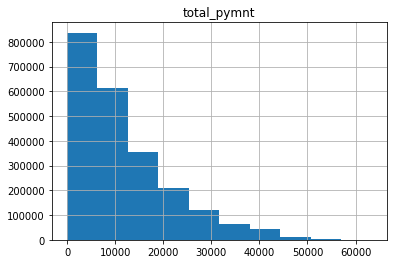

In [21]:
loan.hist(column='total_pymnt')

In [34]:
pd.crosstab(index=loan["loan_status"],  # Make a crosstab
                      columns="count") 

col_0,count
loan_status,
Charged Off,261655
Current,919695
Default,31
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1988
Fully Paid,1041952
In Grace Period,8952
Late (16-30 days),3737
Late (31-120 days),21897


In [64]:
pd.crosstab(index=loan["term"],  # Make a crosstab
                      columns="count") 

col_0,count
term,
36 months,1609754
60 months,650914


In [43]:
loan.dtypes

loan_amnt               int64
funded_amnt             int64
term                   object
int_rate              float64
grade                  object
annual_inc            float64
issue_d        datetime64[ns]
dti                   float64
revol_bal               int64
total_pymnt           float64
loan_status            object
dtype: object